# Based on Mass shooter articles from popular News outlets Does the media tell the full truth about mass shooters?

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st
from pathlib import Path
import seaborn as sns
import gmaps
import gmaps.datasets


#study data files paths
mass_killing_incidents_path = Path("Resources/mass_killing_incidents_public.csv")
mass_offenders_path = Path("Resources/mass_killing_offenders_public.csv")
mass_killing_weapons_path = Path("Resources/mass_killing_weapons_public.csv")
shooting_1982_2023_path = Path("Resources/shooting_1982-2023_cleaned.csv")
violence_project_Path = Path("Resources/Violence Project Mass Shooter Database - Version 6.1.csv")

#to read csv files
mass_killing_incidents = pd.read_csv(mass_killing_incidents_path)
mass_offenders = pd.read_csv(mass_offenders_path)
mass_killing_weapons = pd.read_csv(mass_killing_weapons_path)
shooting_1982_2023 = pd.read_csv(shooting_1982_2023_path)
mass_shooter_df = pd.read_csv(violence_project_Path, skiprows=1)

#combining data to form dataframe
# mass_killing_df = pd.merge(mass_offenders, mass_killing_incidents, how="outer", on=["incident_id", "incident_id"])

df = mass_shooter_df

# Remove the space before the closing quotation mark in column names
df.columns = [col.strip().replace(' "', '"') for col in df.columns]


# Data Frame drop list

In [9]:
# create a list of column names to drop

df = df.drop(columns=["Shooter Last Name", "Shooter First Name", "Day of Week", "Day", "Number Killed", "Number Injured",
               "Month", "Year", "Street Number", "Height", "Weight", "Domestic Abuse Specified", "Street Name", "County", "Zip Code", "State Code", 
                "Region", "Metro/Micro Statistical Area Type", "Location", "Insider or Outsider", "Military Branch", 
                "Kidnapping or Hostage Situation", "Community Involvement", "Community Involvement Specified", "Known to Police or FBI",
                "Workplace Shooting", "Multiple Locations", "Other Location", "Armed Person on Scene", "School Performance", "School Performance Specified",
                "Specify Armed Person", "Part I Crimes", "Part II Crimes", "Highest Level of Justice System Involvement", 
               "Childhood SES", "Mother Violent Treatment", "Parental Substance Abuse", "History of Animal Abuse", "Parent Criminal Record", "Younger Siblings",
                "Family Member Incarcerated", "Adult Trauma", "Recent or Ongoing Stressor", "Known Prejudices", "Birth Order", "Number of Siblings",
               "Signs of Crisis Expanded", "Older Siblings",
               "Children",
                "Prior Hospitalization", "Voluntary or Involuntary Hospitalization", 
                "Prior Counseling", "Voluntary or Mandatory Counseling", "Psychiatric Medication", "Family Member Victim", "Violent Video Games", "Bully", "Bullied",
                "Psychiatric Medication Specified", "Medication Category", "Treatment 6 Months Prior to Shooting", "Gang Affiliation", "Terror Group Affiliation",
               "FASD (Fetal Alcohol Spectrum Disorder)", "Known Family Mental Health History", "Autism Spectrum", "History of Sexual Offenses",
                "Substance Use", "Health Issues", "Health Issues - Specify", "Head Injury / Possible TBI", "Known Hate Group or Chat Room Affiliation",
                "Motive: Racism/Xenophobia", "Interest in Past Mass Violence", "Relationship with Other Shooting(s)", "History of Physical Altercations",
                "Motive: Religious Hate", "Romantic Partner Victim", "Leakage Who", "Religion", "History of Domestic Abuse",
                "Leakage Specific/Nonspecific",
                "Leakage How", "Timeline of Signs of Crisis", 
                "Social Media Use", "Leakage", "Employment Type", "Suicidality",
                "Role of Psychosis in the Shooting", "Raised by Single Parent", "Neglected",
                "Parental Divorce / Separation", "Parental Death in Childhood", "Parental Suicide", "Childhood Trauma", "Physically Abused", "Sexually Abused", 
                "Emotionally Abused"])

df = df.iloc[:, :-16]

df = df.copy() # create a copy of df with the desired columns
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
df

,Case #,Full Date,City,State,Latitude,Longitude,Urban/Suburban/Rural,Age,Gender,Race,Immigrant,Sexual Orientation,Education,Relationship Status,Employment Status,Military Service,Criminal Record,Signs of Being in Crisis,Inability to Perform Daily Tasks,Notably Depressed Mood,Unusually Calm or Happy,Rapid Mood Swings,Increased Agitation,Abusive Behavior,Isolation,Losing Touch with Reality,Paranoia,Mental Illness,Motive: Misogyny,Motive: Homophobia,Motive: Employment Issue,Motive: Economic Issue,Motive: Legal Issue,Motive: Relationship Issue,Motive: Interpersonal Conflict,Motive: Fame-Seeking,Motive: Other,Motive: Unknown
0,1,8/1/1966,Austin,TX,30.286058,-97.739350,0,25.0,0.0,0,0.0,0.0,2.0,2.0,0,1.0,1,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,2,11/12/1966,Mesa,AZ,33.459937,-111.781900,0,18.0,0.0,0,0.0,0.0,0.0,0.0,0,0.0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,3,10/23/1967,Lock Haven,PA,41.125184,-77.451878,2,39.0,0.0,0,0.0,0.0,2.0,2.0,1,1.0,0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,4,3/16/1968,Ironwood,MI,46.535978,-90.156262,2,56.0,0.0,0,0.0,0.0,NaN,0.0,1,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,5,4/5/1969,Harrisburg,PA,40.103677,-75.755056,0,31.0,0.0,1,0.0,0.0,2.0,2.0,0,1.0,0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
5,6,9/23/1970,Albany,NY,42.614852,-73.970812,0,25.0,0.0,1,0.0,0.0,4.0,0.0,1,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
6,7,5/29/1972,Raleigh,NC,35.837199,-78.642979,0,22.0,0.0,1,0.0,0.0,1.0,2.0,1,0.0,1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
7,8,6/21/1972,Cherry Hill,NJ,39.927991,-74.994341,1,33.0,0.0,0,0.0,0.0,2.0,NaN,1,1.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,9,1/7/1973,New Orleans,LA,30.002426,-90.038906,0,23.0,0.0,1,0.0,0.0,2.0,0.0,0,1.0,1,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,10,3/2/1975,Smith River,CA,41.949285,-124.199492,2,21.0,0.0,0,0.0,0.0,NaN,0.0,0,0.0,1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


# Replace numeric column variables with their corresponding string values

In [10]:
df = df.replace(r'^\s*$', 'unknown', regex=True)


# Gender
# create a dictionary to map "Gender" column numerical codes to string values 
code_map = {0: "male", 1: "female"}

# replace numerical codes with their corresponding string values in a column
df["Gender"] = df["Gender"].replace(code_map)
df


# Urban/Suburban/Rural
# create a dictionary to map "Urban/Suburban/Rural" column numerical codes to string values
code_map = {0: "Urban", 1: "Suburban", 2: "Rural"}

df["Urban/Suburban/Rural"] = df["Urban/Suburban/Rural"].replace(code_map)
df

# Immigrant
# create a dictionary to map "Immigrant" column numerical codes to string values
code_map = {0: "No", 1: "Yes"}

df["Immigrant"] = df["Immigrant"].replace(code_map)
df

# Sexual Orientation
# create a dictionary to map "Sexual Orientation" column numerical codes to string values
code_map = {0: "Heterosexual", 1: "Not Heterosexual"}

df["Sexual Orientation"] = df["Sexual Orientation"].replace(code_map)
df


# Race
# create a dictionary to map "Race" column numerical codes to string values

# Convert non-integers to NaN
df["Race"] = pd.to_numeric(df["Race"], errors="coerce")

# Remove rows with non-integer values
df = df.dropna(subset=["Race"])

# Convert remaining values to integers
df["Race"] = df["Race"].astype(int)

code_map = {0: "White", 1: "Black", 2: "Latinx", 3: "Asian", 4: "Middle Eastern", 5: "Native American", "Moroccan": "Moroccan", "Bosnian": "Bosnian"}

df["Race"] = df["Race"].replace(code_map)
df


# Education
# create a dictionary to map "Education" column numerical codes to string values
code_map = {0: "Less than high school", 1: "High school/GED", 2: "Some college/trade school", 
            3: "Bachelor's degree", 4: "Graduate school/advanced degree"}

df["Education"] = df["Education"].replace(code_map)
df


# Relationship Status
# create a dictionary to map "Relationship Status" column numerical codes to string values
code_map = {0: "Single", 1: "Boyfriend/girlfriend", 2: "Married", 
            3: "Divorced/separated/widowed"}

df["Relationship Status"] = df["Relationship Status"].replace(code_map)
df




# Convert non-integers to NaN
df["Employment Status"] = pd.to_numeric(df["Employment Status"], errors="coerce")

# Remove rows with non-integer values
df = df.dropna(subset=["Employment Status"])

# Convert remaining values to integers
df["Employment Status"] = df["Employment Status"].astype(int)

# create a dictionary to map "Immigrant" column numerical codes to string values
code_map = {0: "Not Working", 1: "Working", "Unknown": "Unknown", "unknown": "unknown"}

df["Employment Status"] = df["Employment Status"].replace(code_map)
df



# # Employment Type
# # create a dictionary to map "Employment Type" column numerical codes to string values
# code_map = {0: "Blue collar", 1: "White collar ", 2: "In between"}

# df["Employment Type"] = df["Employment Type"].replace(code_map)
# df


# Military Service
# create a dictionary to map "Employment Type" column numerical codes to string values
code_map = {0: "No", 1: "Yes ", 2: "Joined but did not make it"}

df["Military Service"] = df["Military Service"].replace(code_map)
df

# Criminal Record
# create a dictionary to map "Employment Type" column numerical codes to string values
df["Criminal Record"] = df["Criminal Record"].astype(float).round(1)
code_map = {0: "No Evidence", 1: "Yes "}

df["Criminal Record"] = df["Criminal Record"].replace(code_map)
df

# Signs of Being in Crisis
# create a dictionary to map "Employment Type" column numerical codes to string values
code_map = {0: "No", 1: "Yes "}

df["Signs of Being in Crisis"] = df["Signs of Being in Crisis"].replace(code_map)
df

# Mental Illness
# create a dictionary to map "Employment Type" column numerical codes to string values
df['Mental Illness'] = pd.to_numeric(df['Mental Illness'], errors='coerce')

df["Mental Illness"] = df["Mental Illness"].astype(float).round(1)
code_map = {0: "No Evidence", 1: "Mood Disorder", 2: "Thought disorder", 
            3: "Other Psychiatric", 4: "Indication of mental problems"}

# Iterate over each column in the DataFrame
df["Mental Illness"] = df["Mental Illness"].replace(code_map)
df

# Paranoia
# create a dictionary to map "Employment Type" column numerical codes to string values
df['Paranoia'] = pd.to_numeric(df['Paranoia'], errors='coerce')

df["Paranoia"] = df["Paranoia"].astype(float).round(1)
code_map = {0: "No Evidence", 1: "Yes"}

# Iterate over each column in the DataFrame
df["Paranoia"] = df["Paranoia"].replace(code_map)
df


# Inability to Perform Daily Tasks
# create a dictionary to map "Employment Type" column numerical codes to string values
df['Inability to Perform Daily Tasks'] = pd.to_numeric(df['Inability to Perform Daily Tasks'], errors='coerce')

df["Inability to Perform Daily Tasks"] = df["Inability to Perform Daily Tasks"].astype(float).round(1)
code_map = {0: "No Evidence", 1: "Yes"}

# Iterate over each column in the DataFrame
df["Inability to Perform Daily Tasks"] = df["Inability to Perform Daily Tasks"].replace(code_map)
df



# Notably Depressed Mood
# create a dictionary to map "Employment Type" column numerical codes to string values
df['Notably Depressed Mood'] = pd.to_numeric(df['Notably Depressed Mood'], errors='coerce')

df["Notably Depressed Mood"] = df["Notably Depressed Mood"].astype(float).round(1)
code_map = {0: "No Evidence", 1: "Yes"}

# Iterate over each column in the DataFrame
df["Notably Depressed Mood"] = df["Notably Depressed Mood"].replace(code_map)
df



# Unusually Calm or Happy
# create a dictionary to map "Employment Type" column numerical codes to string values
df['Unusually Calm or Happy'] = pd.to_numeric(df['Unusually Calm or Happy'], errors='coerce')

df["Unusually Calm or Happy"] = df["Unusually Calm or Happy"].astype(float).round(1)
code_map = {0: "No Evidence", 1: "Yes"}

# Iterate over each column in the DataFrame
df["Unusually Calm or Happy"] = df["Unusually Calm or Happy"].replace(code_map)
df



# Rapid Mood Swings
# create a dictionary to map "Employment Type" column numerical codes to string values
df['Rapid Mood Swings'] = pd.to_numeric(df['Rapid Mood Swings'], errors='coerce')

df["Rapid Mood Swings"] = df["Rapid Mood Swings"].astype(float).round(1)
code_map = {0: "No Evidence", 1: "Yes"}

# Iterate over each column in the DataFrame
df["Rapid Mood Swings"] = df["Rapid Mood Swings"].replace(code_map)
df

# Increased Agitation
# create a dictionary to map "Employment Type" column numerical codes to string values
df['Increased Agitation'] = pd.to_numeric(df['Increased Agitation'], errors='coerce')

df["Increased Agitation"] = df["Increased Agitation"].astype(float).round(1)
code_map = {0: "No Evidence", 1: "Yes"}

# Iterate over each column in the DataFrame
df["Increased Agitation"] = df["Increased Agitation"].replace(code_map)
df



# Abusive Behavior
# create a dictionary to map "Employment Type" column numerical codes to string values
df['Abusive Behavior'] = pd.to_numeric(df['Abusive Behavior'], errors='coerce')

df["Abusive Behavior"] = df["Abusive Behavior"].astype(float).round(1)
code_map = {0: "No Evidence", 1: "Yes"}

# Iterate over each column in the DataFrame
df["Abusive Behavior"] = df["Abusive Behavior"].replace(code_map)
df


# Abusive Behavior
# create a dictionary to map "Employment Type" column numerical codes to string values
df['Isolation'] = pd.to_numeric(df['Isolation'], errors='coerce')

df["Isolation"] = df["Isolation"].astype(float).round(1)
code_map = {0: "No Evidence", 1: "Yes"}

# Iterate over each column in the DataFrame
df["Isolation"] = df["Isolation"].replace(code_map)
df


# Abusive Behavior
# create a dictionary to map "Employment Type" column numerical codes to string values
df['Losing Touch with Reality'] = pd.to_numeric(df['Losing Touch with Reality'], errors='coerce')

df["Losing Touch with Reality"] = df["Losing Touch with Reality"].astype(float).round(1)
code_map = {0: "No Evidence", 1: "Yes"}

# Iterate over each column in the DataFrame
df["Losing Touch with Reality"] = df["Losing Touch with Reality"].replace(code_map)
df


# Motive: Misogyny
# create a dictionary to map "Employment Type" column numerical codes to string values
df['Motive: Misogyny'] = pd.to_numeric(df['Motive: Misogyny'], errors='coerce')

df["Motive: Misogyny"] = df["Motive: Misogyny"].astype(float).round(1)
code_map = {0: "No Evidence", 1: "Yes"}

# Iterate over each column in the DataFrame
df["Motive: Misogyny"] = df["Motive: Misogyny"].replace(code_map)
df


# Motive: Homophobia
# create a dictionary to map "Employment Type" column numerical codes to string values
df['Motive: Homophobia'] = pd.to_numeric(df['Motive: Homophobia'], errors='coerce')

df["Motive: Homophobia"] = df["Motive: Homophobia"].astype(float).round(1)
code_map = {0: "No Evidence", 1: "Yes"}

# Iterate over each column in the DataFrame
df["Motive: Homophobia"] = df["Motive: Homophobia"].replace(code_map)
df



# Motive: Employment Issue
# create a dictionary to map "Employment Type" column numerical codes to string values
df['Motive: Employment Issue'] = pd.to_numeric(df['Motive: Employment Issue'], errors='coerce')

df["Motive: Employment Issue"] = df["Motive: Employment Issue"].astype(float).round(1)
code_map = {0: "No Evidence", 1: "Yes"}

# Iterate over each column in the DataFrame
df["Motive: Employment Issue"] = df["Motive: Employment Issue"].replace(code_map)
df


# Motive: Economic Issue
# create a dictionary to map "Employment Type" column numerical codes to string values
df['Motive: Economic Issue'] = pd.to_numeric(df['Motive: Economic Issue'], errors='coerce')

df["Motive: Economic Issue"] = df["Motive: Economic Issue"].astype(float).round(1)
code_map = {0: "No Evidence", 1: "Yes"}

# Iterate over each column in the DataFrame
df["Motive: Economic Issue"] = df["Motive: Economic Issue"].replace(code_map)
df


# Motive: Legal Issue
# create a dictionary to map "Employment Type" column numerical codes to string values
df['Motive: Legal Issue'] = pd.to_numeric(df['Motive: Legal Issue'], errors='coerce')

df["Motive: Legal Issue"] = df["Motive: Legal Issue"].astype(float).round(1)
code_map = {0: "No Evidence", 1: "Yes"}

# Iterate over each column in the DataFrame
df["Motive: Legal Issue"] = df["Motive: Legal Issue"].replace(code_map)
df



# Motive: Relationship Issue
# create a dictionary to map "Employment Type" column numerical codes to string values
df['Motive: Relationship Issue'] = pd.to_numeric(df['Motive: Relationship Issue'], errors='coerce')

df["Motive: Relationship Issue"] = df["Motive: Relationship Issue"].astype(float).round(1)
code_map = {0: "No Evidence", 1: "Yes"}

# Iterate over each column in the DataFrame
df["Motive: Relationship Issue"] = df["Motive: Relationship Issue"].replace(code_map)
df



# Motive: Interpersonal Conflict
# create a dictionary to map "Employment Type" column numerical codes to string values
df['Motive: Interpersonal Conflict'] = pd.to_numeric(df['Motive: Interpersonal Conflict'], errors='coerce')

df["Motive: Interpersonal Conflict"] = df["Motive: Interpersonal Conflict"].astype(float).round(1)
code_map = {0: "No Evidence", 1: "Yes"}

# Iterate over each column in the DataFrame
df["Motive: Interpersonal Conflict"] = df["Motive: Interpersonal Conflict"].replace(code_map)
df


# Motive: Fame-Seeking
# create a dictionary to map "Employment Type" column numerical codes to string values
df['Motive: Fame-Seeking'] = pd.to_numeric(df['Motive: Fame-Seeking'], errors='coerce')

df["Motive: Fame-Seeking"] = df["Motive: Fame-Seeking"].astype(float).round(1)
code_map = {0: "No Evidence", 1: "Yes"}

# Iterate over each column in the DataFrame
df["Motive: Fame-Seeking"] = df["Motive: Fame-Seeking"].replace(code_map)
df



# Motive: Other
# create a dictionary to map "Employment Type" column numerical codes to string values
df['Motive: Other'] = pd.to_numeric(df['Motive: Other'], errors='coerce')

df["Motive: Other"] = df["Motive: Other"].astype(float).round(1)
code_map = {0: "No Evidence", 1: "Yes"}

# Iterate over each column in the DataFrame
df["Motive: Other"] = df["Motive: Other"].replace(code_map)
df



# Motive: Unknown
# create a dictionary to map "Employment Type" column numerical codes to string values
df['Motive: Unknown'] = pd.to_numeric(df['Motive: Unknown'], errors='coerce')

df["Motive: Unknown"] = df["Motive: Unknown"].astype(float).round(1)
code_map = {0: "No Evidence", 1: "Yes"}

# Iterate over each column in the DataFrame
df["Motive: Unknown"] = df["Motive: Unknown"].replace(code_map)
df





,Case #,Full Date,City,State,Latitude,Longitude,Urban/Suburban/Rural,Age,Gender,Race,Immigrant,Sexual Orientation,Education,Relationship Status,Employment Status,Military Service,Criminal Record,Signs of Being in Crisis,Inability to Perform Daily Tasks,Notably Depressed Mood,Unusually Calm or Happy,Rapid Mood Swings,Increased Agitation,Abusive Behavior,Isolation,Losing Touch with Reality,Paranoia,Mental Illness,Motive: Misogyny,Motive: Homophobia,Motive: Employment Issue,Motive: Economic Issue,Motive: Legal Issue,Motive: Relationship Issue,Motive: Interpersonal Conflict,Motive: Fame-Seeking,Motive: Other,Motive: Unknown
0,1,8/1/1966,Austin,TX,30.286058,-97.739350,Urban,25.0,male,White,No,Heterosexual,Some college/trade school,Married,Not Working,Yes,Yes,Yes,Yes,Yes,No Evidence,Yes,Yes,No Evidence,No Evidence,No Evidence,No Evidence,Mood Disorder,No Evidence,No Evidence,No Evidence,No Evidence,No Evidence,No Evidence,No Evidence,No Evidence,No Evidence,Yes
1,2,11/12/1966,Mesa,AZ,33.459937,-111.781900,Urban,18.0,male,White,No,Heterosexual,Less than high school,Single,Not Working,No,No Evidence,Yes,No Evidence,No Evidence,No Evidence,No Evidence,No Evidence,No Evidence,Yes,No Evidence,No Evidence,Thought disorder,Yes,No Evidence,No Evidence,No Evidence,No Evidence,No Evidence,No Evidence,Yes,No Evidence,No Evidence
2,3,10/23/1967,Lock Haven,PA,41.125184,-77.451878,Rural,39.0,male,White,No,Heterosexual,Some college/trade school,Married,Working,Yes,No Evidence,Yes,No Evidence,No Evidence,No Evidence,No Evidence,Yes,No Evidence,Yes,Yes,Yes,Indication of mental problems,No Evidence,No Evidence,No Evidence,No Evidence,No Evidence,No Evidence,Yes,No Evidence,No Evidence,No Evidence
3,4,3/16/1968,Ironwood,MI,46.535978,-90.156262,Rural,56.0,male,White,No,Heterosexual,NaN,Single,Working,No,No Evidence,No,No Evidence,No Evidence,No Evidence,No Evidence,No Evidence,No Evidence,No Evidence,No Evidence,No Evidence,No Evidence,No Evidence,No Evidence,No Evidence,No Evidence,No Evidence,Yes,No Evidence,No Evidence,No Evidence,No Evidence
4,5,4/5/1969,Harrisburg,PA,40.103677,-75.755056,Urban,31.0,male,Black,No,Heterosexual,Some college/trade school,Married,Not Working,Yes,No Evidence,Yes,No Evidence,No Evidence,No Evidence,No Evidence,Yes,No Evidence,No Evidence,Yes,Yes,Thought disorder,No Evidence,No Evidence,No Evidence,No Evidence,No Evidence,No Evidence,No Evidence,No Evidence,Yes,No Evidence
5,6,9/23/1970,Albany,NY,42.614852,-73.970812,Urban,25.0,male,Black,No,Heterosexual,Graduate school/advanced degree,Single,Working,No,No Evidence,No,No Evidence,No Evidence,No Evidence,No Evidence,No Evidence,No Evidence,No Evidence,No Evidence,No Evidence,No Evidence,Yes,No Evidence,No Evidence,No Evidence,No Evidence,No Evidence,No Evidence,No Evidence,No Evidence,Yes
6,7,5/29/1972,Raleigh,NC,35.837199,-78.642979,Urban,22.0,male,Black,No,Heterosexual,High school/GED,Married,Working,No,Yes,Yes,No Evidence,Yes,No Evidence,No Evidence,No Evidence,No Evidence,Yes,No Evidence,No Evidence,Mood Disorder,No Evidence,No Evidence,No Evidence,No Evidence,Yes,No Evidence,No Evidence,No Evidence,No Evidence,No Evidence
7,8,6/21/1972,Cherry Hill,NJ,39.927991,-74.994341,Suburban,33.0,male,White,No,Heterosexual,Some college/trade school,NaN,Working,Yes,Yes,No,No Evidence,No Evidence,No Evidence,No Evidence,No Evidence,No Evidence,No Evidence,No Evidence,No Evidence,No Evidence,No Evidence,No Evidence,Yes,No Evidence,No Evidence,No Evidence,No Evidence,No Evidence,No Evidence,No Evidence
8,9,1/7/1973,New Orleans,LA,30.002426,-90.038906,Urban,23.0,male,Black,No,Heterosexual,Some college/trade school,Single,Not Working,Yes,Yes,Yes,No Evidence,No Evidence,No Evidence,Yes,Yes,Yes,Yes,Yes,No Evidence,Indication of mental problems,No Evidence,No Evidence,No Evidence,No Evidence,No Evidence,No Evidence,No Evidence,No Evidence,No Evidence,No Evidence
9,10,3/2/1975,Smith River,CA,41.949285,-124.199492,Rural,21.0,male,White,No,Heterosexual,NaN,Single,Not Working,No,Yes,Yes,No Ev

# create Age group column

In [20]:
# create a new column 'Age_Group' based on the 'Age' column
df['Age_Group'] = pd.cut(df['Age'], bins=[12, 17, 29, 39, 49, 59, 69, float('inf')], 
                         labels=['12-17', '18-29', '30-39', '40-49', '50-59', '60-69', '70+'])

# print the new column 'Age_Group'
age_groups = df['Age_Group']

print(age_groups.head())


0    18-29
1    18-29
2    30-39
3    50-59
4    30-39
Name: Age_Group, dtype: category
Categories (7, object): ['12-17' < '18-29' < '30-39' < '40-49' < '50-59' < '60-69' < '70+']


# Age distribution among mass shooters

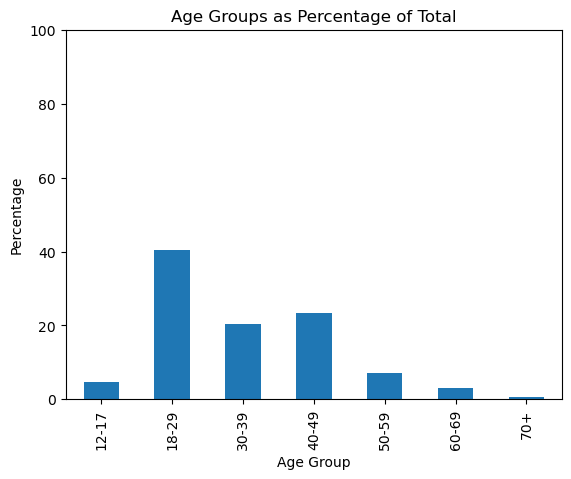

In [21]:
# create a bar chart showing age groups as percentage of total
age_groups = df['Age_Group'].value_counts(normalize=True) * 100

# sort the age groups by index in ascending order
age_groups = age_groups.sort_index(ascending=True)

# create a bar chart
age_groups.plot(kind='bar')

# set the y-axis limit to 100
plt.ylim([0, 100])

# add chart title and axis labels
plt.title('Age Groups as Percentage of Total')
plt.xlabel('Age Group')
plt.ylabel('Percentage')

# display the chart
plt.show()




# Race distribution among mass shooters

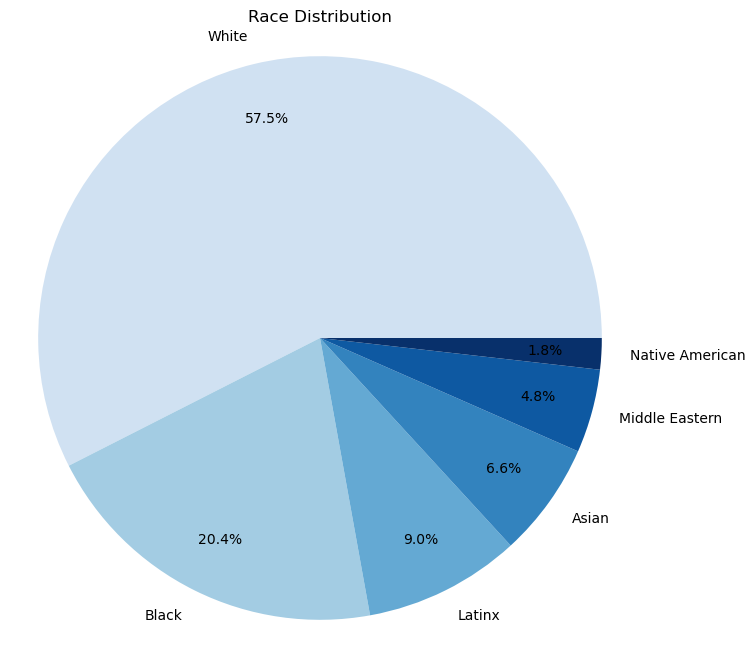

In [22]:
# Group the total number of values in "Gender" based on "Race"
grouped_data = df['Race'].value_counts()

# Set the figure size
plt.figure(figsize=(8, 8))

# Define the colors in gradients of blue
colors = plt.cm.Blues(np.linspace(0.2, 1, len(grouped_data)))

# Create a pie chart
plt.pie(grouped_data, labels=grouped_data.index, autopct='%1.1f%%', pctdistance=0.8, colors=colors)

# Set the aspect ratio to be equal to display a perfect circle
plt.axis('equal')

# Add a title
plt.title('Race Distribution')

# Display the chart
plt.show()

# Gender distribution among mass shooters

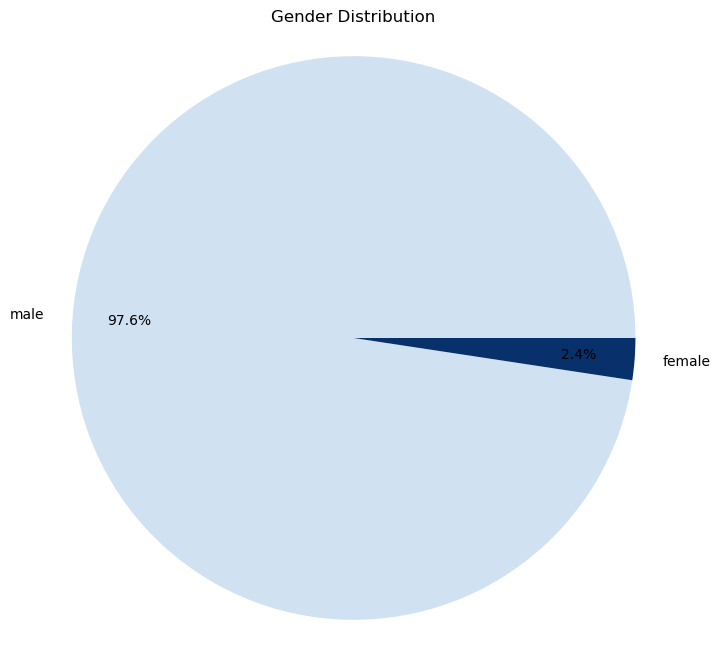

In [23]:
# Group the total number of values in "Gender" based on "Race"
grouped_data = df['Gender'].value_counts()

# Set the figure size
plt.figure(figsize=(8, 8))

# Define the colors in gradients of blue
colors = plt.cm.Blues(np.linspace(0.2, 1, len(grouped_data)))

# Create a pie chart
plt.pie(grouped_data, labels=grouped_data.index, autopct='%1.1f%%', pctdistance=0.8, colors=colors)

# Set the aspect ratio to be equal to display a perfect circle
plt.axis('equal')

# Add a title
plt.title('Gender Distribution')

# Display the chart
plt.show()

# Education level distribution among mass shooters

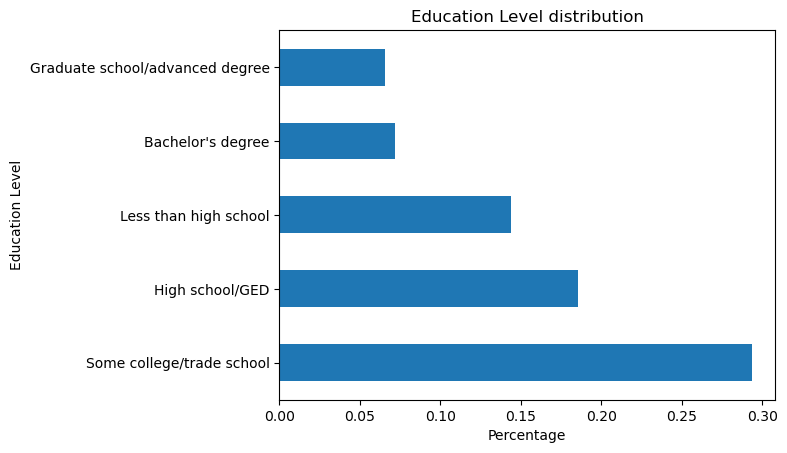

In [24]:
# Count the number of occurrences of each age group
age_counts = df['Education'].value_counts()

# Divide by the total number of rows to get the percentage
age_percentages = age_counts / len(df)

# Create a horizontal bar chart
ax = age_percentages.plot(kind='barh')
ax.set_xlabel('Percentage')
ax.set_ylabel('Education Level')

# Add a title to the chart
ax.set_title('Education Level distribution')
plt.show()

# Employment status distribution among mass shooters

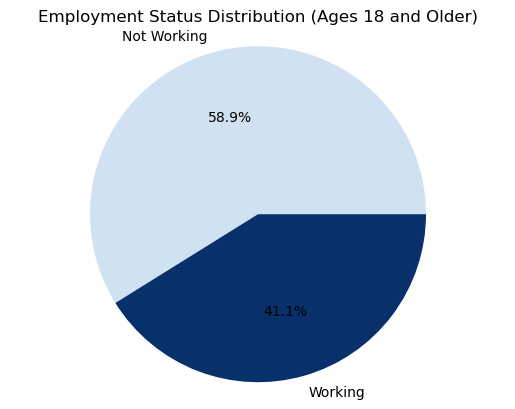

In [25]:

# Filter out the rows with Age Group less than 18
filtered_df = df[df['Age'] >= 18]

# Group by Employment Status and calculate the count of each value
grouped_df = filtered_df['Employment Status'].value_counts()

# Calculate the percentage of each employment status
employment_percentages = grouped_df / len(filtered_df) * 100

# Define the colors in gradients of blue
colors = plt.cm.Blues(np.linspace(0.2, 1, len(grouped_data)))

# Create a pie chart
plt.pie(employment_percentages, labels=employment_percentages.index, autopct='%1.1f%%', colors=colors)

# Set the aspect ratio to be equal to display a perfect circle
plt.axis('equal')

# Add a title
plt.title('Employment Status Distribution (Ages 18 and Older)')

# Display the chart
plt.show()


# Criminal record distribution for Adults(18 and older)

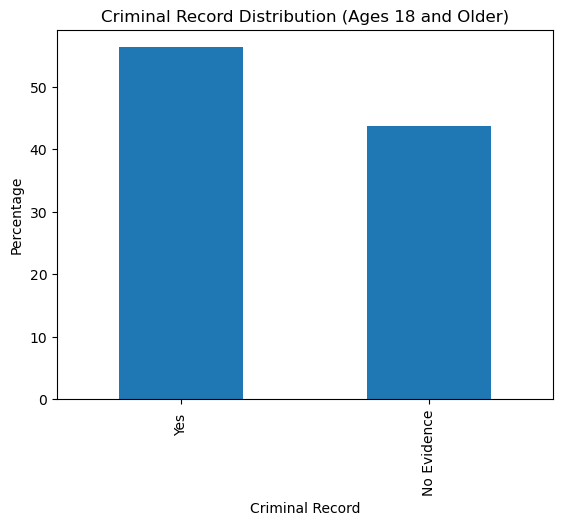

In [26]:

# Filter out the rows with Age Group less than 18
filtered_df = df[df['Age'] >= 18]

# Group by Criminal Record and calculate the count of each value
grouped_df = filtered_df['Criminal Record'].value_counts()

# Calculate the percentage of each criminal record
criminal_record_percentages = grouped_df / len(filtered_df) * 100

# Create a bar chart
criminal_record_percentages.plot(kind='bar')

# Add labels to the x-axis and y-axis
plt.xlabel('Criminal Record')
plt.ylabel('Percentage')

# Add a title
plt.title('Criminal Record Distribution (Ages 18 and Older)')

# Display the chart
plt.show()


# Signs of being in crisis distribution

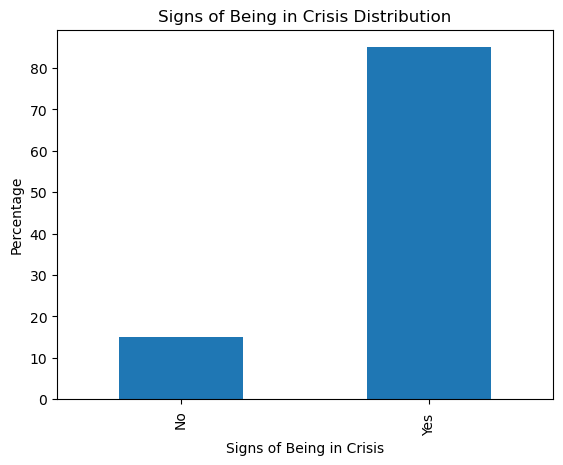

In [27]:
import matplotlib.pyplot as plt

# Group by "Signs of Being in Crisis" within the entire DataFrame and calculate the count of each value
grouped_df = df.groupby('Signs of Being in Crisis')['Case #'].count()

# Calculate the percentage of each "Signs of Being in Crisis"
crisis_signs_percentages = grouped_df / len(df) * 100

# Create a bar chart
crisis_signs_percentages.plot(kind='bar')

# Add labels to the x-axis and y-axis
plt.xlabel('Signs of Being in Crisis')
plt.ylabel('Percentage')

# Add a title
plt.title('Signs of Being in Crisis Distribution')

# Display the chart
plt.show()


# Concerning behaviors of mass shooters

In [28]:

data = []
start_column = "Inability to Perform Daily Tasks"
end_column = "Paranoia"
target_value = "Yes"

start_index = df.columns.get_loc(start_column)
end_index = df.columns.get_loc(end_column)

columns = df.columns[start_index:end_index+1]

for column in columns:
    count_targets_col = df[column].value_counts().get(target_value, 0)
    total_values = len(df[column])
    percentages = (count_targets_col / total_values) * 100
    
    data.append({
        'Concerning Behaviors': column,
        'Number': count_targets_col,
        'Percentages': round(percentages, 0)
    })

new_df = pd.DataFrame(data)
print(new_df)


               Concerning Behaviors  Number  Percentages
0  Inability to Perform Daily Tasks      44         26.0
1            Notably Depressed Mood      55         33.0
2           Unusually Calm or Happy       7          4.0
3                 Rapid Mood Swings      49         29.0
4               Increased Agitation     116         69.0
5                  Abusive Behavior      74         44.0
6                         Isolation      75         45.0
7         Losing Touch with Reality      62         37.0
8                          Paranoia      47         28.0


# Motives of mass shooters

In [5]:
data = []
start_column = "Motive: Misogyny"
end_column = "Motive: Unknown"
target_value = "Yes"

start_index = df.columns.get_loc(start_column)
end_index = df.columns.get_loc(end_column)

columns = df.columns[start_index:end_index+1]

for column in columns:
    count_targets_col = df[column].value_counts().get(target_value, 0)
    total_values = len(df[column])
    percentages = (count_targets_col / total_values) * 100
    
    data.append({
        'Motive': column,
        'Number': count_targets_col,
        'Percentages': round(percentages, 0)
    })

new_df = pd.DataFrame(data)
print(new_df)



                           Motive  Number  Percentages
0                Motive: Misogyny       7          4.0
1              Motive: Homophobia       3          2.0
2        Motive: Employment Issue      35         21.0
3          Motive: Economic Issue      19         11.0
4             Motive: Legal Issue      21         13.0
5      Motive: Relationship Issue      21         13.0
6  Motive: Interpersonal Conflict      29         17.0
7            Motive: Fame-Seeking      12          7.0
8                   Motive: Other      40         24.0
9                 Motive: Unknown      38         23.0


# Mental illness distribution among mass shooters

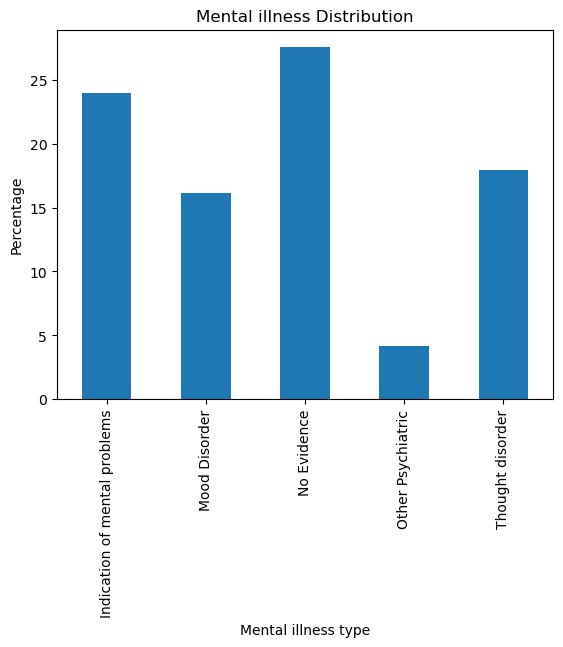

In [30]:
# Group by "Signs of Being in Crisis" within the entire DataFrame and calculate the count of each value
grouped_df = df.groupby('Mental Illness')['Case #'].count()

# Calculate the percentage of each "Signs of Being in Crisis"
mental_illness_percentages = grouped_df / len(df) * 100

# Create a bar chart
mental_illness_percentages.plot(kind='bar')

# Add labels to the x-axis and y-axis
plt.xlabel('Mental illness type')
plt.ylabel('Percentage')

# Add a title
plt.title('Mental illness Distribution')

# Display the chart
plt.show()



# Race v Mental Illness

In [36]:
mental_illness_df = df.groupby("Race")["Mental Illness"].value_counts()
mental_illness_df

Race             Mental Illness               
Asian            Thought disorder                  5
                 Indication of mental problems     2
                 No Evidence                       2
                 Mood Disorder                     1
Black            No Evidence                      12
                 Indication of mental problems     7
                 Thought disorder                  6
                 Mood Disorder                     4
                 Other Psychiatric                 4
Latinx           No Evidence                       7
                 Indication of mental problems     3
                 Thought disorder                  2
                 Mood Disorder                     1
Middle Eastern   Indication of mental problems     4
                 Mood Disorder                     2
                 No Evidence                       2
Native American  No Evidence                       2
                 Mood Disorder                     1